# **Exploratory Data Analysis - Retail**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

### Import Dataset

In [3]:
df=pd.read_csv(r"C:\Documents\Datasets\SampleSuperstore.csv")
df.tail(1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.16,2,0.0,72.948


In [4]:
df.shape

(9994, 13)

In [5]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# Get the numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation = df[numeric_cols].corr()

# Print the correlation matrix
print(correlation)

             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000


#### Dropping unnecessary column from the dataset

In [10]:
df.drop('Country', axis=1, inplace=True)
df.tail(1)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9993,Second Class,Consumer,Westminster,California,92683,West,Office Supplies,Appliances,243.16,2,0.0,72.948


In [11]:
df.shape

(9994, 12)

## Exploratory Data Analysis

***Multivariate Visualizations.***

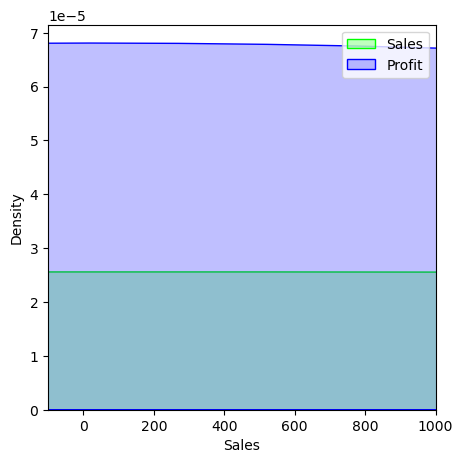

In [12]:
plt.figure(figsize=(5,5))
sns.kdeplot(df['Sales'],color='lime',label='Sales',shade=True,bw=25)
sns.kdeplot(df['Profit'],color='blue',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()

### Profit is more than sale but there are some areas where profit could be increased

Text(0.5, 1.0, 'Correlation')

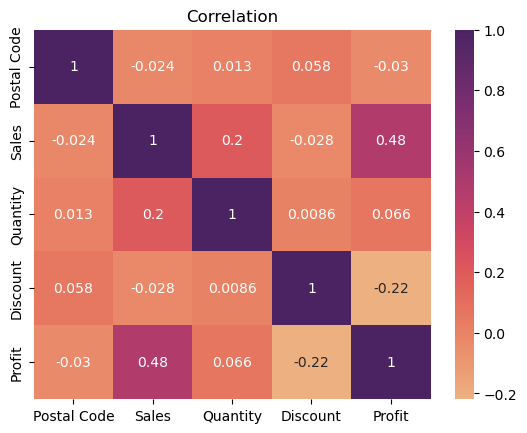

In [13]:
sns.heatmap(correlation,annot=True,cmap='flare')
plt.title('Correlation')

***This heatmap shows that:***
- Sales and Profit are Moderately Correlated.
- Discount and Profit are Negatively Correlated
- Quantity and Profit are less Moderately Correlated.

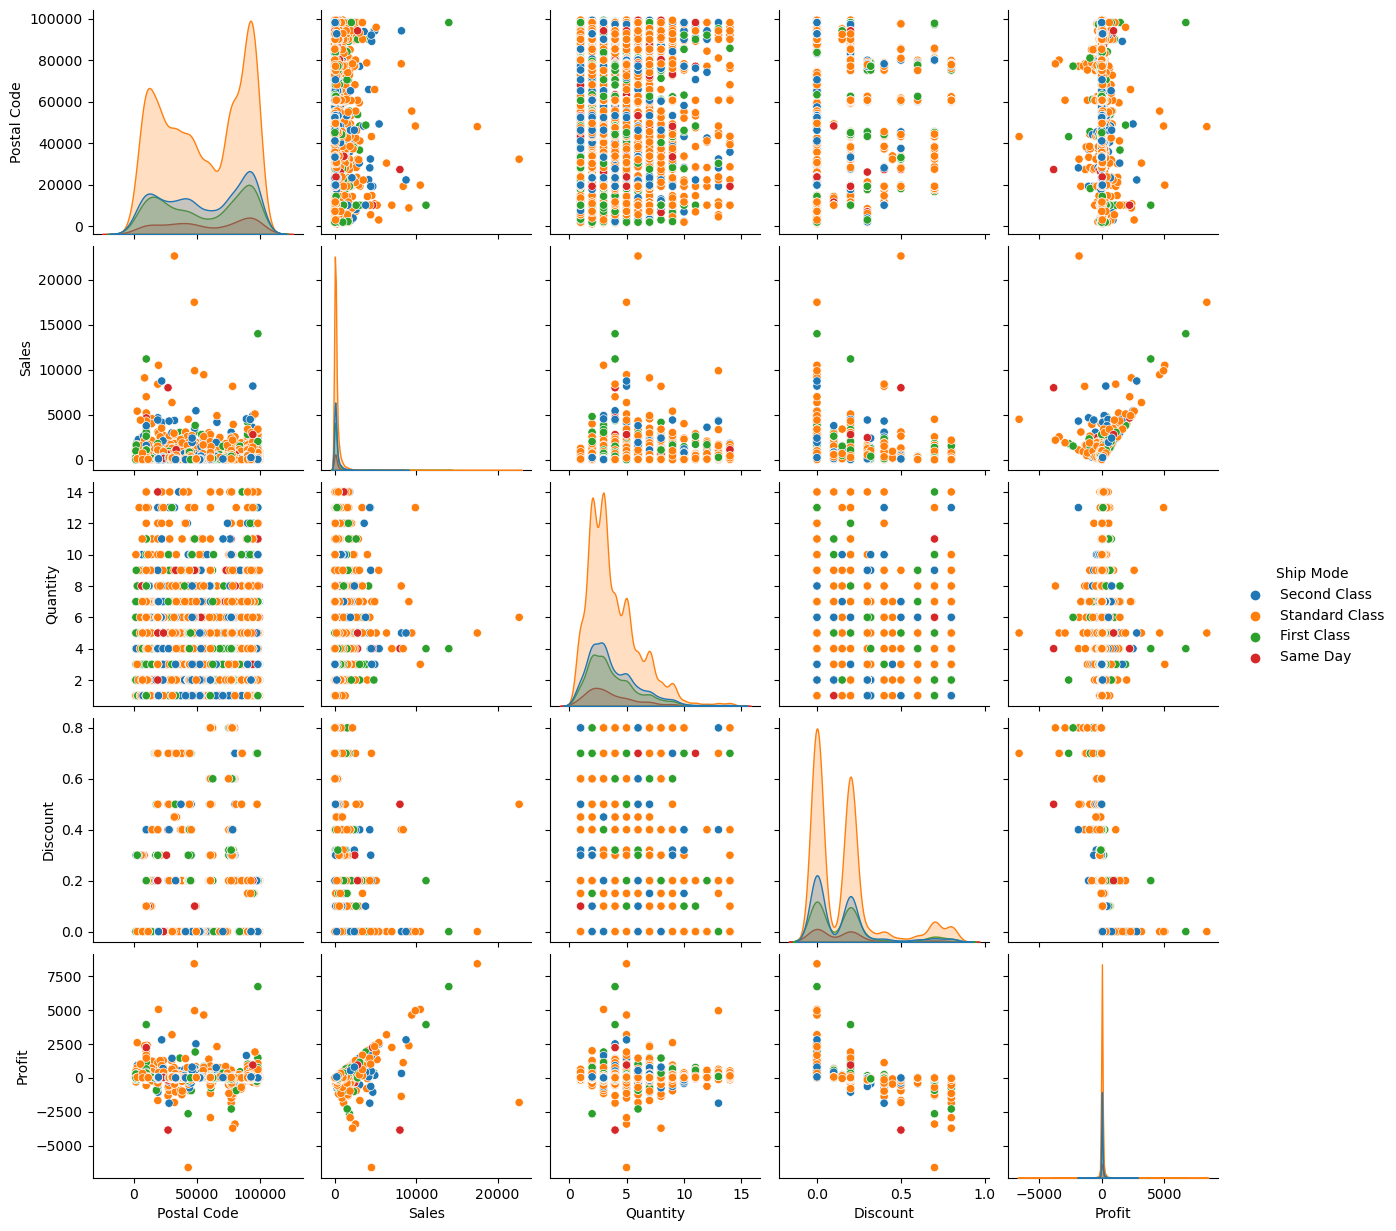

In [14]:
sns.pairplot(df,hue='Ship Mode')

### Distribution Plots for each column.

- **Catagory**

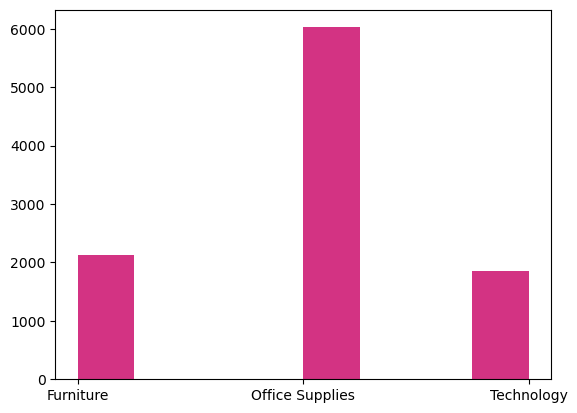

In [18]:
num_bins = 8
plt.hist(df['Category'], num_bins, facecolor ="#c80064" , alpha = 0.8)
plt.show()

- **Discount**

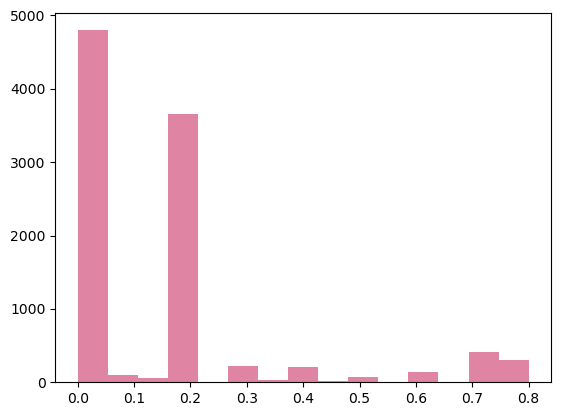

In [19]:
num_bins = 15
plt.hist(df['Discount'], num_bins, facecolor ="#d7658b" , alpha = 0.8)
plt.show()

- **Segment**

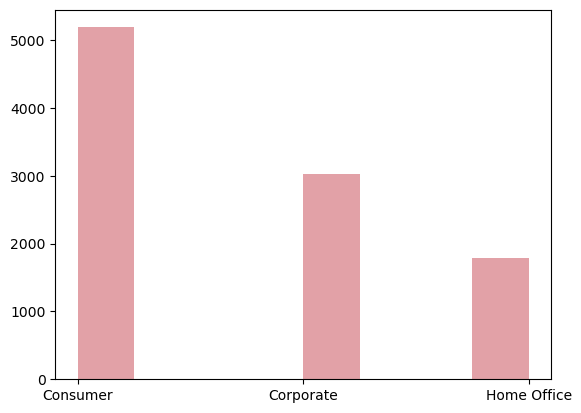

In [20]:
num_bins = 8
plt.hist(df['Segment'], num_bins, facecolor ="#df979e" , alpha = 0.9)
plt.show()

- **Ship Mode**

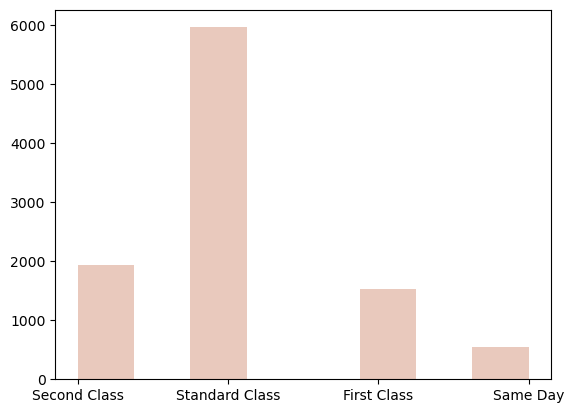

In [21]:
num_bins = 8
plt.hist(df['Ship Mode'], num_bins, facecolor ="#e4bcad" , alpha = 0.8)
plt.show()

- **Postal Code**

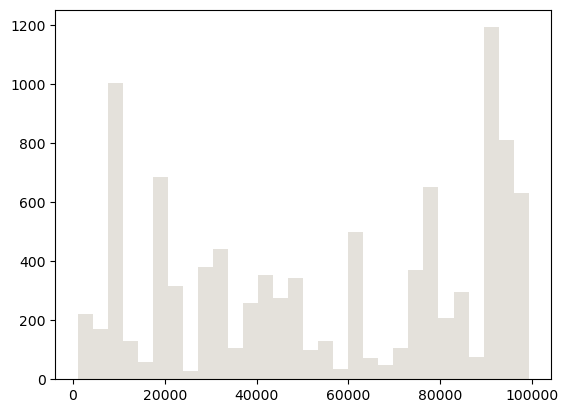

In [22]:
num_bins = 30
plt.hist(df['Postal Code'], num_bins, facecolor ="#dedad2" , alpha = 0.8)
plt.show()

### Sales by Region.

Text(0, 0.5, 'Sales')

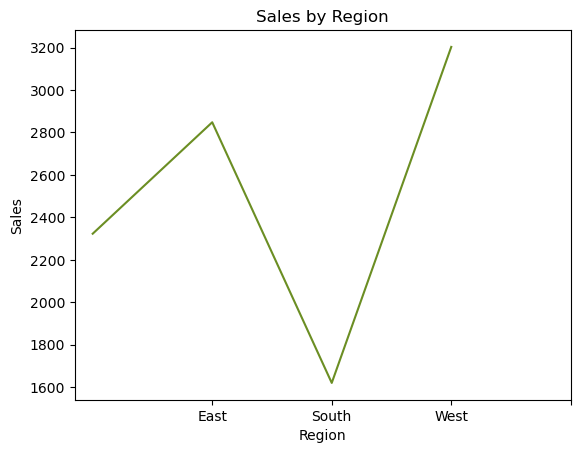

In [23]:
sales_by_region = df.groupby('Region').size()
plot_by_region = sales_by_region.plot(title='Sales by Region',xticks=(1,2,3,4,),color='olivedrab')
plot_by_region.set_xlabel('Region')
plot_by_region.set_ylabel('Sales')

### Sales by Profit

Text(0, 0.5, 'Sales')

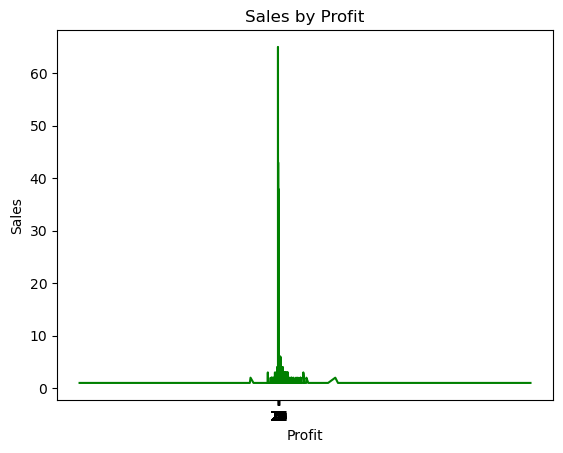

In [24]:
sales_by_profit = df.groupby('Profit').size()
plot_by_profit = sales_by_profit.plot(title='Sales by Profit', xticks = range(0, 30), color='green')
plot_by_profit.set_xlabel('Profit')
plot_by_profit.set_ylabel('Sales')

### Sales by Category

Text(0, 0.5, 'Sales')

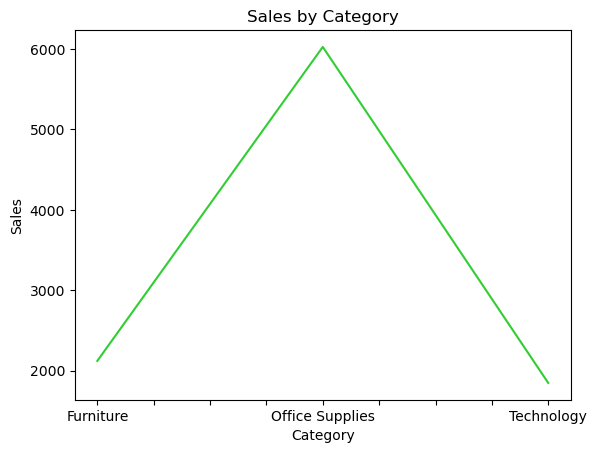

In [25]:
sales_by_category = df.groupby('Category').size()
plot_by_category = sales_by_category.plot(title='Sales by Category', color='limegreen')
plot_by_category.set_xlabel('Category')
plot_by_category.set_ylabel('Sales')

### Sales by Ship Mode

Text(0, 0.5, 'Sales')

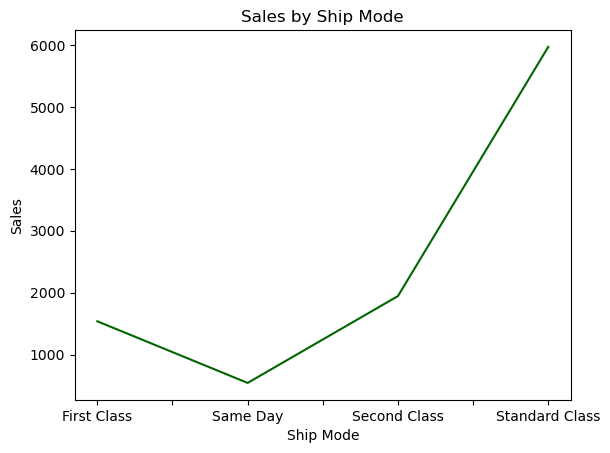

In [26]:
sales_by_shipmode = df.groupby('Ship Mode').size()
sales_by_shipmode = sales_by_shipmode.plot(title='Sales by Ship Mode',color='darkgreen')
sales_by_shipmode.set_xlabel('Ship Mode')
sales_by_shipmode.set_ylabel('Sales')

### Sales by Segment

Text(0, 0.5, 'Sales')

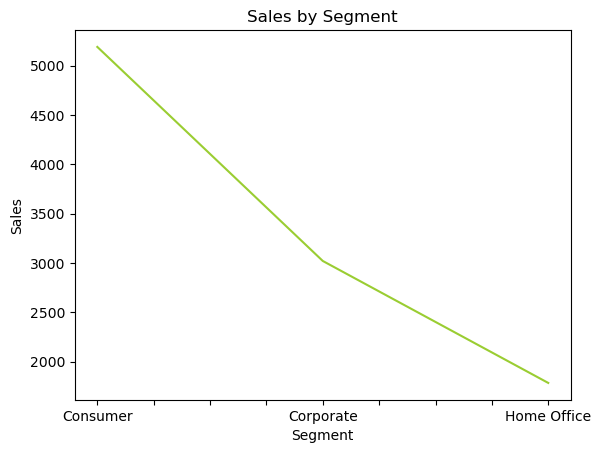

In [27]:
sales_by_segment = df.groupby('Segment').size()
sales_by_segment = sales_by_segment.plot(title='Sales by Segment', color='yellowgreen')
sales_by_segment.set_xlabel('Segment')
sales_by_segment.set_ylabel('Sales')

### Count Plot of each column.

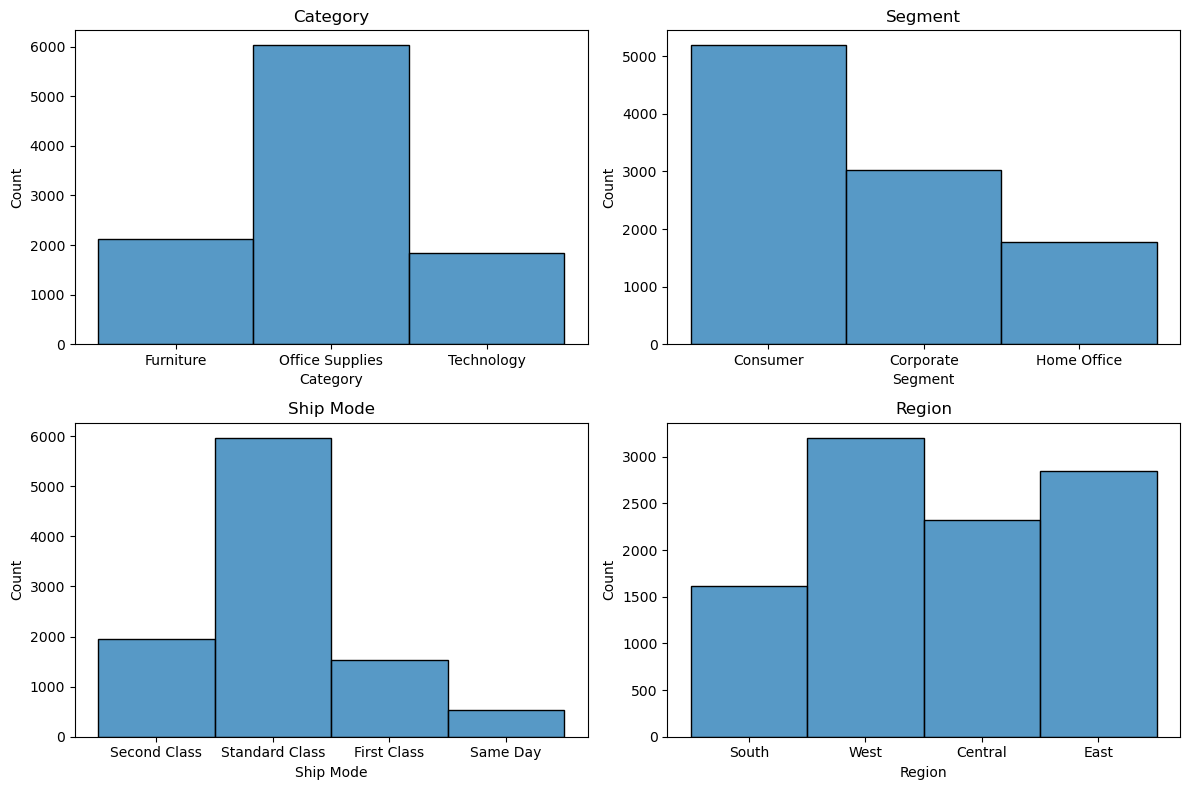

In [28]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(12,8));
sns.histplot(df['Category'],ax=axs[0][0])
sns.histplot(df['Segment'],ax=axs[0][1])
sns.histplot(df['Ship Mode'],ax=axs[1][0])
sns.histplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=12)
axs[0][1].set_title('Segment',fontsize=12)
axs[1][0].set_title('Ship Mode',fontsize=12)
axs[1][1].set_title('Region',fontsize=12)
plt.tight_layout()

<Axes: xlabel='Sub-Category', ylabel='Count'>

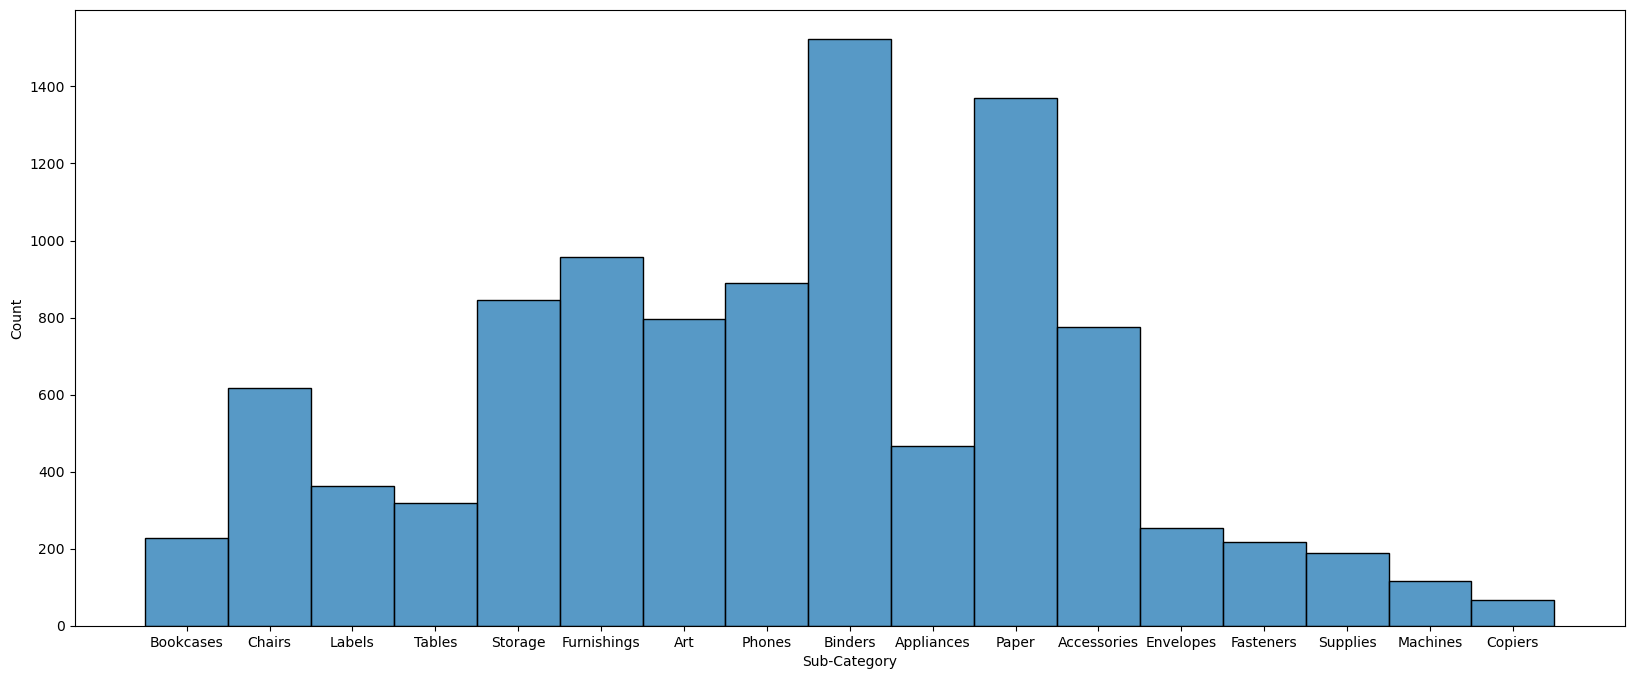

In [29]:
plt.figure(figsize=(20,8))
sns.histplot(df['Sub-Category'])

### Distribution of Quantity to Sales

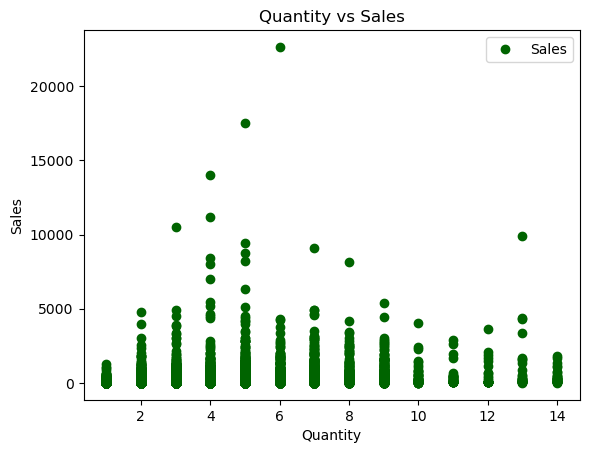

In [30]:
df.plot(x='Quantity', y='Sales', style='o', color='darkgreen')
plt.title('Quantity vs Sales', fontsize=12)  
plt.xlabel('Quantity')  
plt.ylabel('Sales')  
plt.show()

### Distribution of Discount to Sales

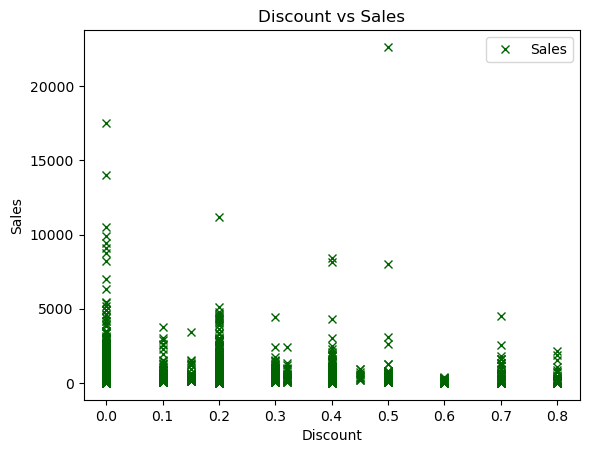

In [31]:
df.plot(x='Discount', y='Sales', style='x', color='darkgreen')
plt.title('Discount vs Sales')  
plt.xlabel('Discount')  
plt.ylabel('Sales')  
plt.show()

### Distribution of Discount to Profit

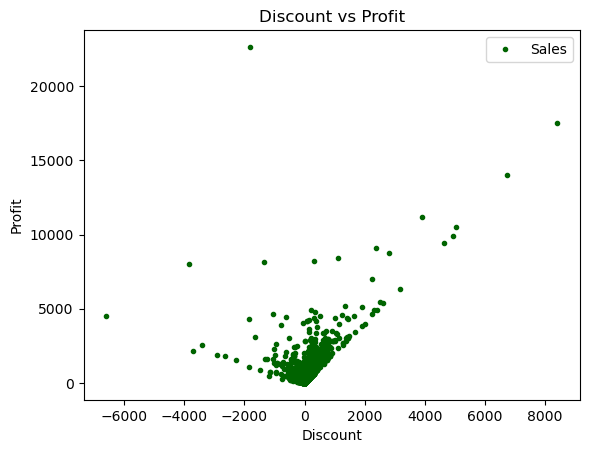

In [32]:
df.plot(x='Profit', y='Sales', style='.', color='darkgreen')
plt.title('Discount vs Profit')  
plt.xlabel('Discount')  
plt.ylabel('Profit')  
plt.show()

### Distribution of data

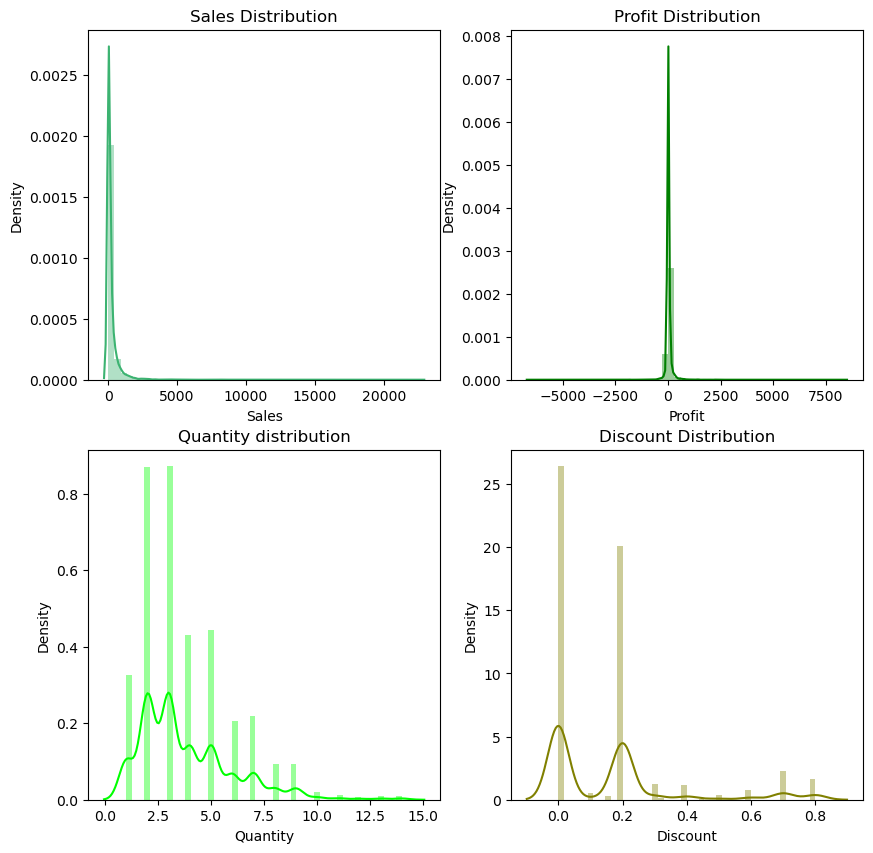

In [33]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(df['Sales'], color = 'mediumseagreen',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'lime',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'olive',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 12)
axs[0][1].set_title('Profit Distribution', fontsize = 12)
axs[1][0].set_title('Quantity distribution', fontsize = 12)
axs[1][1].set_title('Discount Distribution', fontsize = 12)
plt.show()

### State Wise Deal Analysis

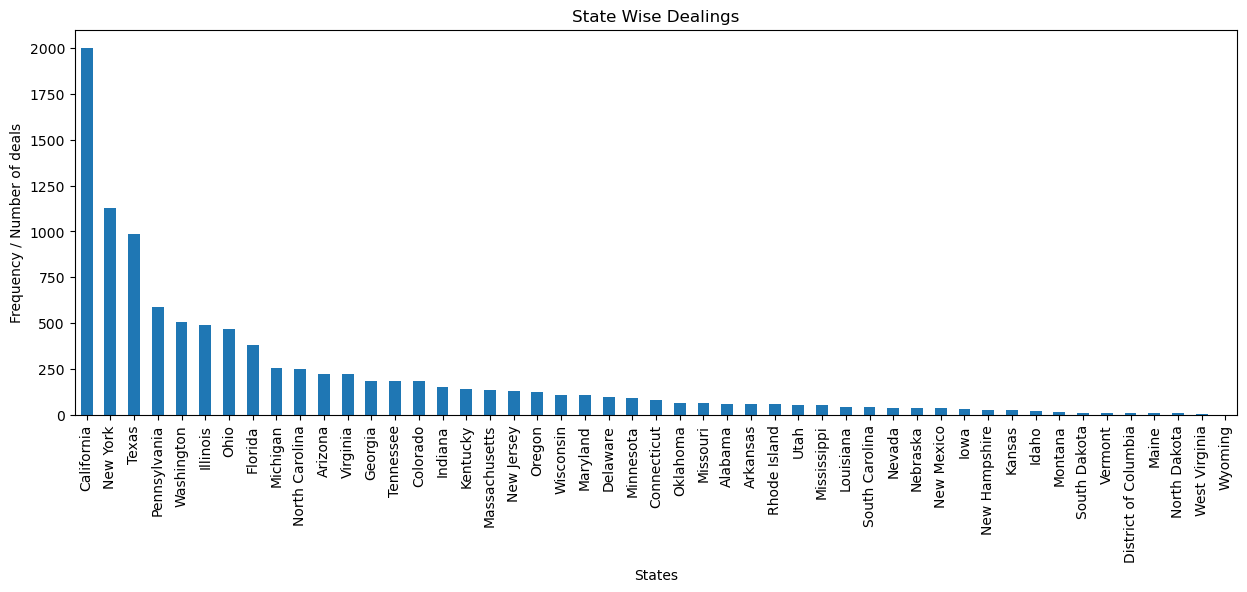

In [34]:
df1 = df['State'].value_counts()
df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')
plt.title('State Wise Dealings', fontsize = 12)
plt.show()

- **Top 3 states:** Califonia, New York, Texas

- **Lowest Deals:** Wyoming

### City Wise Deal Analysis

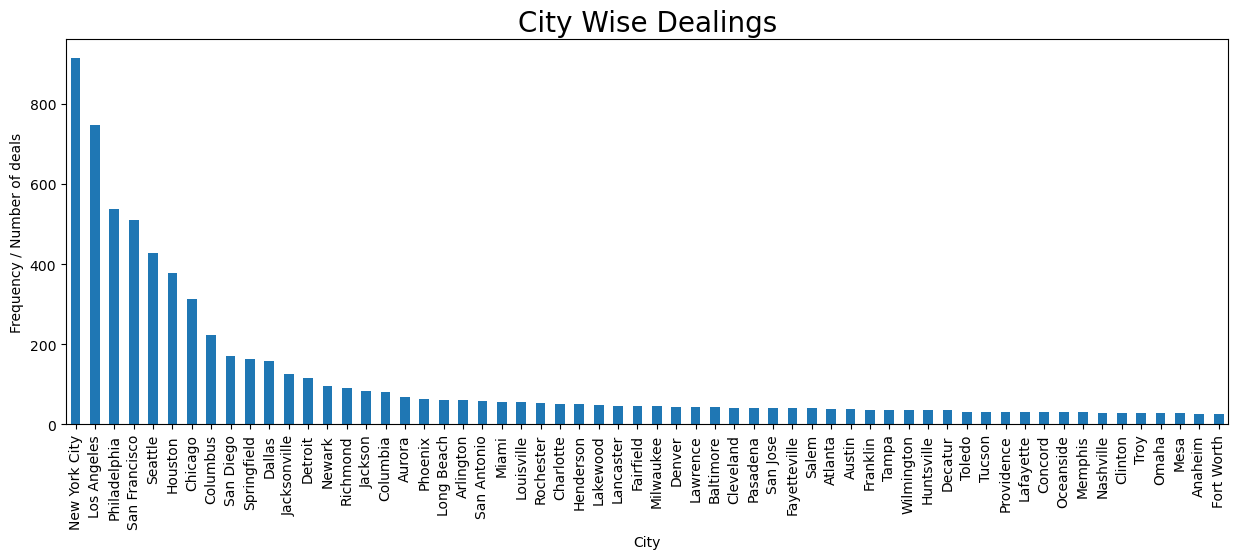

In [35]:
df2 = df['City'].value_counts()
df2=df2.head(60)
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')
plt.title('City Wise Dealings', fontsize = 20)
plt.show()

- **Top 3 cities:** New York City, Los Angeles, Philadelphia

In [36]:
df['City'].value_counts().mean()

18.821092278719398

***Average number of deals per city is 18.8***

### Segment Wise Analysis of Profit, Discount and Sell

In [37]:
df['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [38]:
df_segment= df.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


### Segment Wise Analysis of Sale, Profit and Discount

Text(0.5, 1.0, 'Segment Wise Analysis')

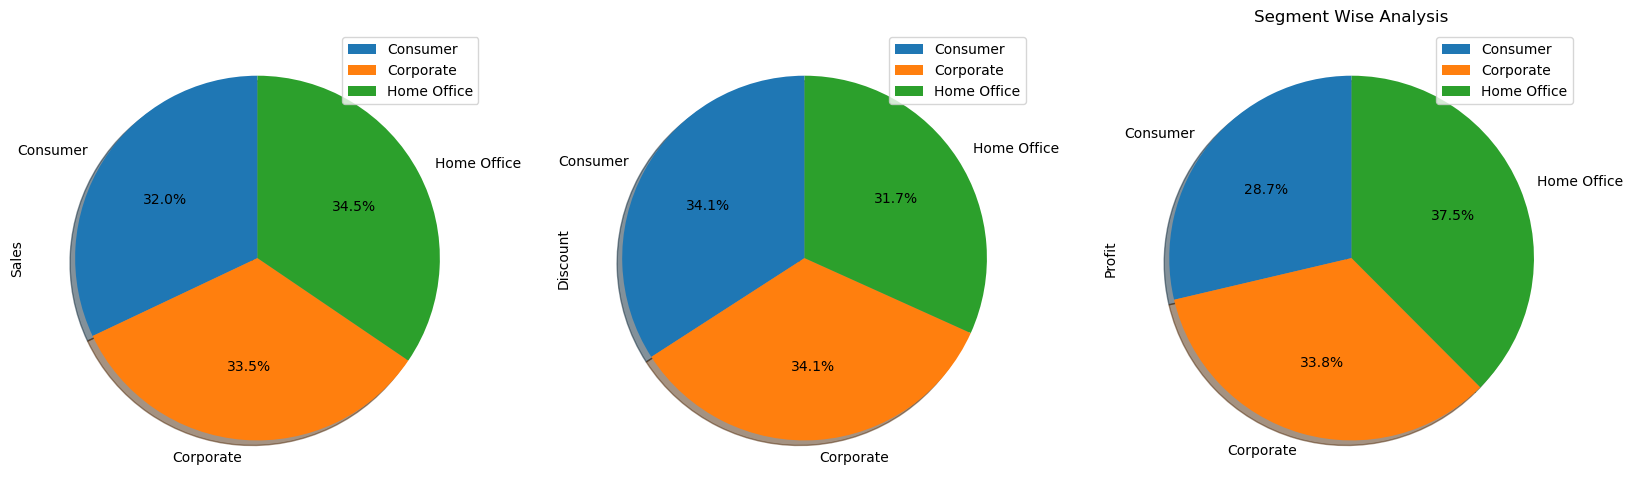

In [39]:
df_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20,22),
                    startangle=90,     
                    shadow=True,
                    labels = df_segment.index)
plt.title('Segment Wise Analysis')

### Quantity Wise Analysis of Sale, Profit and Discount

Text(0.5, 1.0, 'Quantity Wise Analysis')

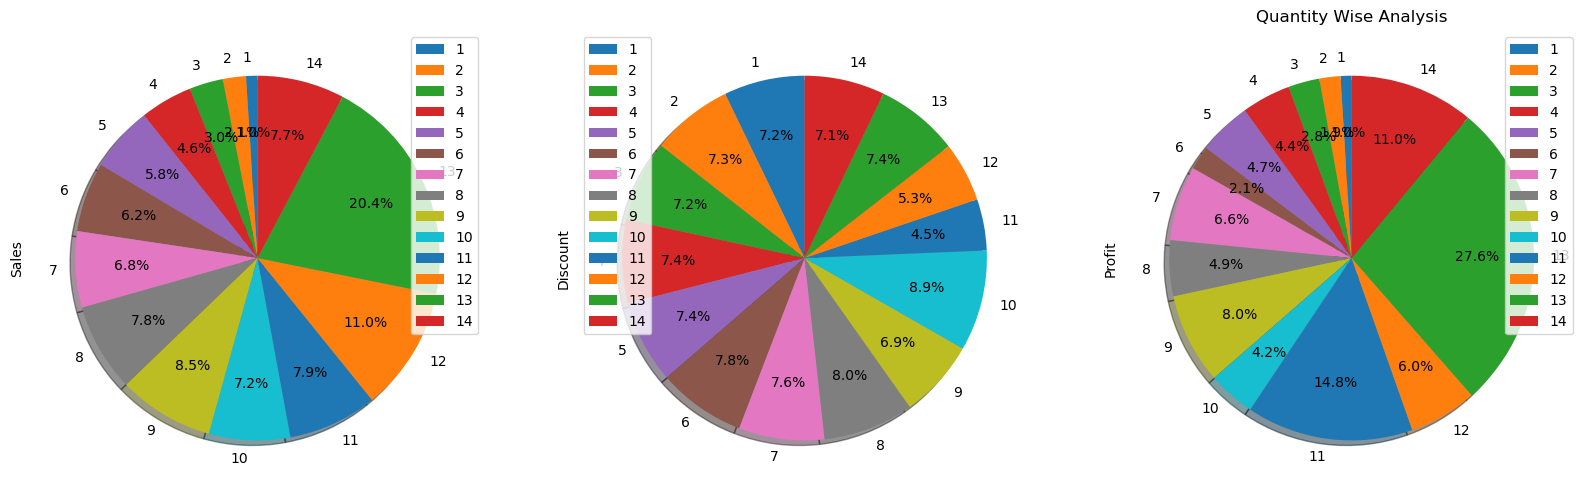

In [40]:
df_quantity = df.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df_quantity.head(10)
df_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_quantity.index)
plt.title('Quantity Wise Analysis')

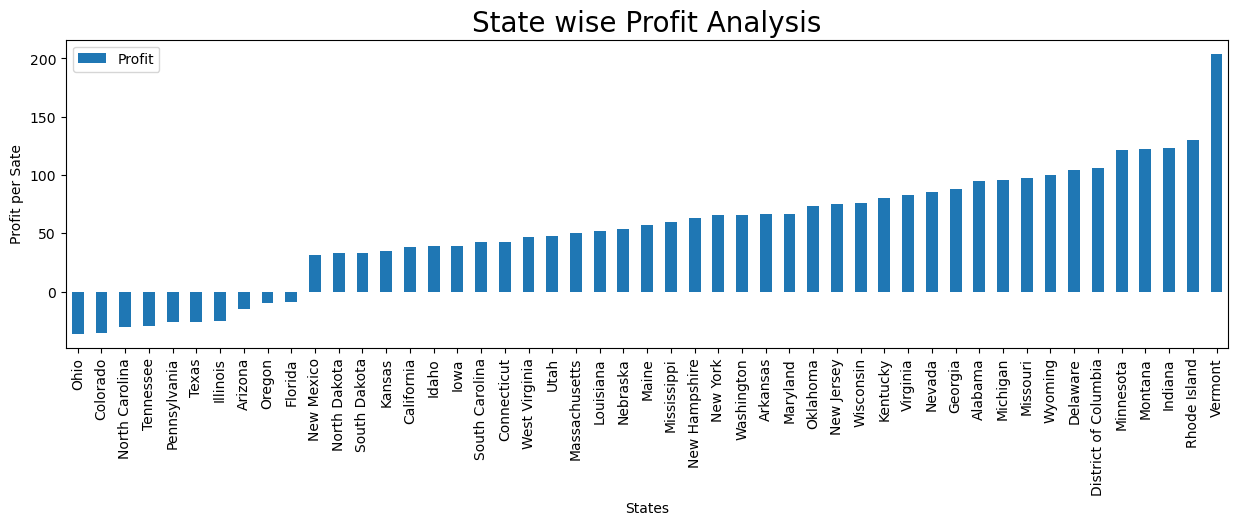

In [41]:
df['State'].value_counts().head(10)
df_state= df.groupby(['State'])[['Sales','Discount','Profit']].mean()
df_state.head(10)
df_state1=df_state.sort_values('Profit')
df_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

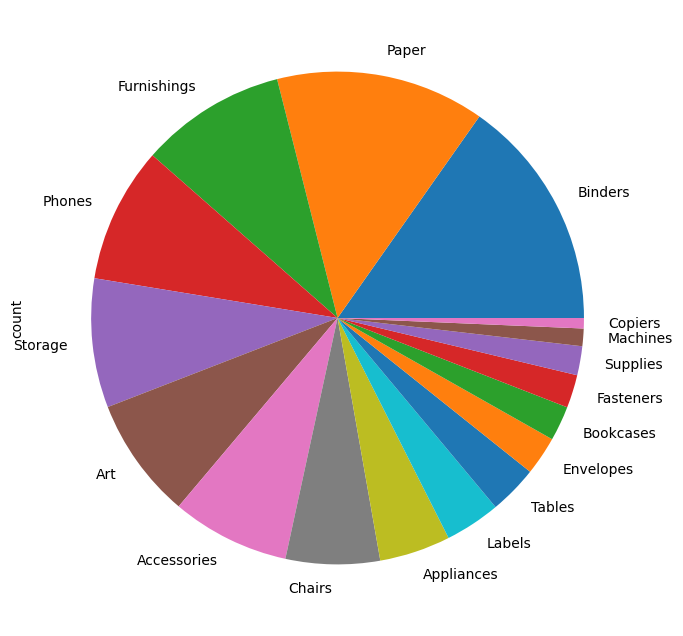

In [42]:
plt.figure(figsize=(10,8))
df['Sub-Category'].value_counts().plot.pie(autopct='')
plt.show()

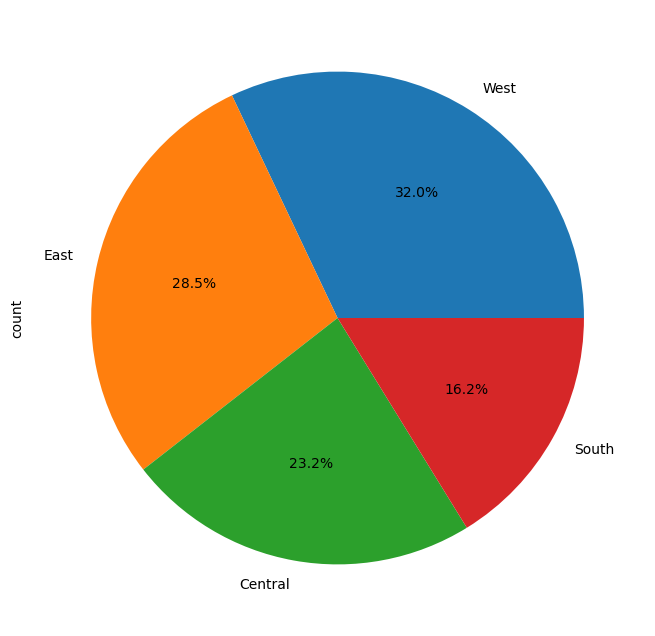

In [43]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

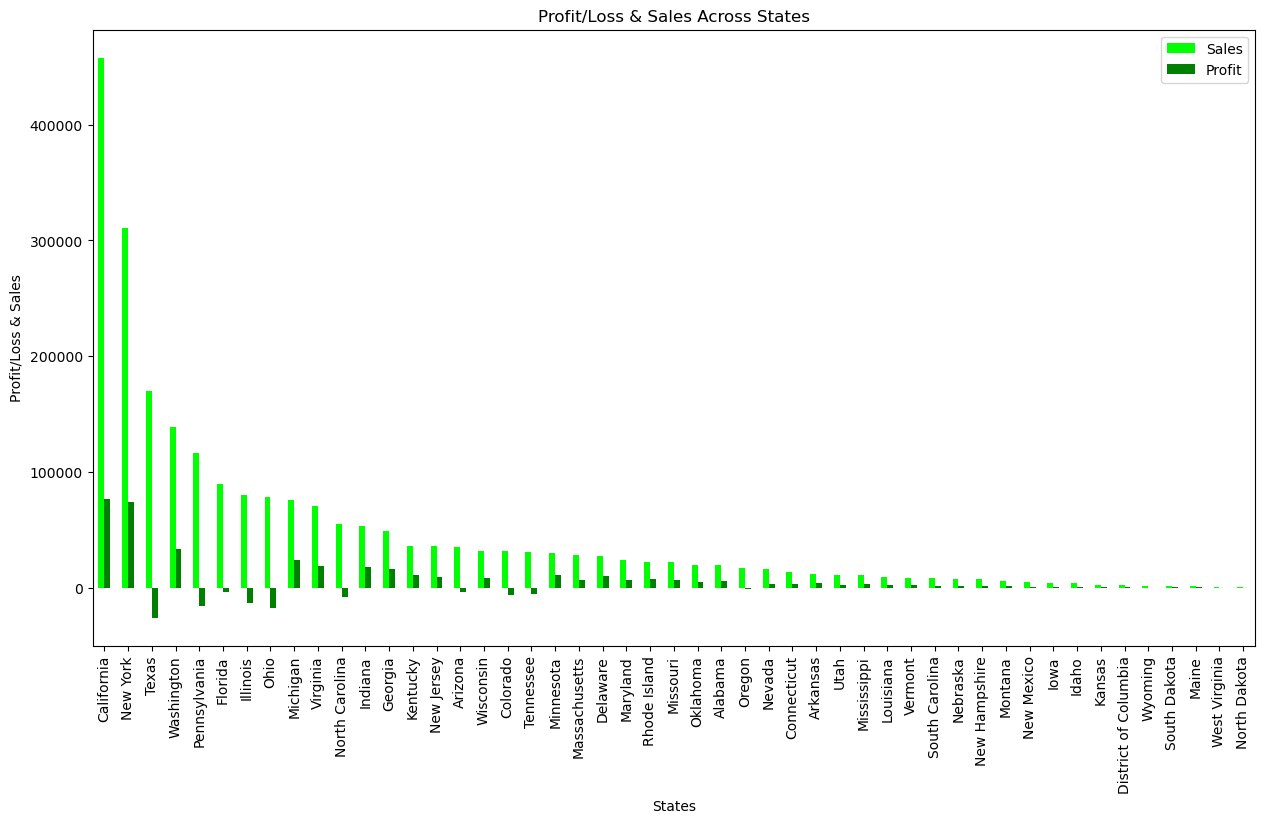

In [44]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['lime','green'],figsize=(15,8))
plt.title('Profit/Loss & Sales Across States')
plt.xlabel('States')
plt.ylabel('Profit/Loss & Sales')
plt.show()

### State Wise Analysis

Text(0.5, 1.0, 'State Wise Analysis')

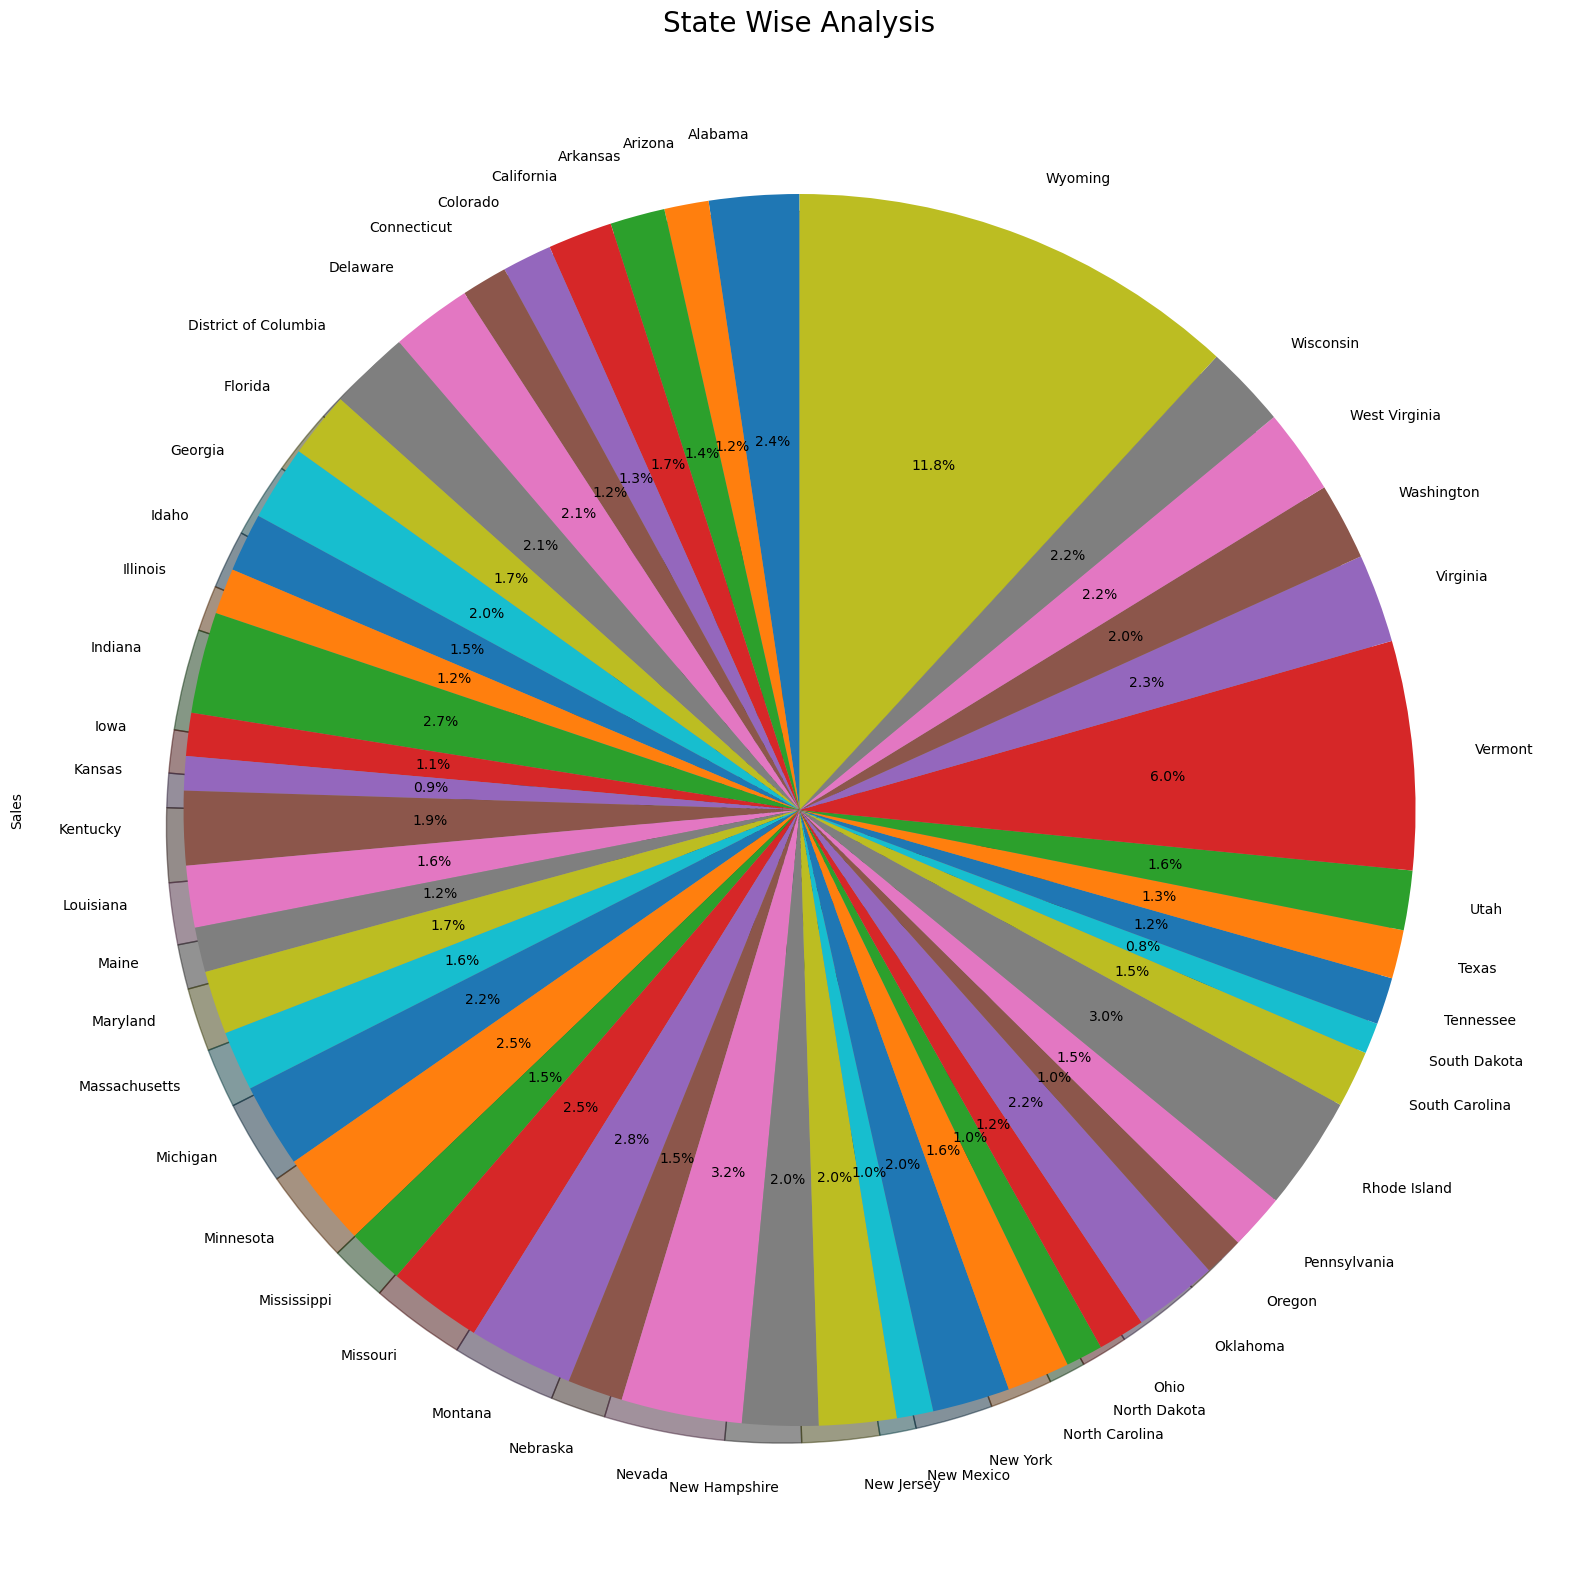

In [45]:
df_state['Sales'].plot(kind='pie',
                        figsize = (20,20),
                        autopct='%1.1f%%',
                        startangle=90,     # start angle 90° (Africa)
                        shadow=True)
plt.title('State Wise Analysis',fontsize=20)

### Observation & Conclusions

- State: Ohio: Lowest Profit.
- Furniture have less Profit.
- State: Vermont: Highest Profit.
- Sales is high for Same day ship.
- Sub-category: Copier: High Profit & sales.
- Segment: Home-office: High Profit & sales.
- Lowest amount of sales South Dakota(0.8%).
- Sales and Profit are Moderately Correlated.
- Profit and Discount is high in First Class.
- Category: Minimun profit obtain in Furniture.
- Discount and Profit are Negatively Correlated.
- Technology and Office Supplies have high profit.
- Quantity and Profit are less Moderately Correlated.
- Category: Maximun sales and Profit obtain in Technology.
- Sub-category: Binders , Machines and then tables have high Discount.
- Profit is more than that of sale but there are some areas where profit could be increased.


